In [153]:
# --- Importing Libraries ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import yellowbrick
import pickle

from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100
set_palette('dark')

In [154]:
import warnings
warnings.filterwarnings('ignore')

# data wrangling & pre-processing
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

#model validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics

# cross validation
from sklearn.model_selection import StratifiedKFold

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 
import xgboost as xgb

from scipy import stats


In [155]:
# --- Importing Dataset ---
from google.colab import files
files.upload()
# --- Reading Dataset ---
df = pd.read_csv('heartt.csv')


Saving heartt.csv to heartt (4).csv


In [156]:
dt = pd.read_csv('heartt.csv')

In [157]:
df.head().style.background_gradient(cmap='Greens').set_properties(**{'font-family': 'Segoe UI'}).hide_index()


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
52,1,0,125,212,0,1,168,0,1.000000,2,2,3,0
53,1,0,140,203,1,0,155,1,3.100000,0,0,3,0
70,1,0,145,174,0,1,125,1,2.600000,0,0,3,0
61,1,0,148,203,0,1,161,0,0.000000,2,1,3,0
62,0,0,138,294,1,1,106,0,1.900000,1,3,2,0


In [158]:
# --- Print Dataset Info ---
print('\033[1m'+'.: Dataset Info :.'+'\033[0m')
print('*' * 30)
print('Total Rows:'+'\033[1m', df.shape[0])
print('\033[0m'+'Total Columns:'+'\033[1m', df.shape[1])
print('\033[0m'+'*' * 30)
print('\n')

# --- Print Dataset Detail ---
print('\033[1m'+'.: Dataset Details :.'+'\033[0m')
print('*' * 30)
df.info(memory_usage = False)

.: Dataset Info :.
******************************
Total Rows: 1025
Total Columns: 14
******************************


.: Dataset Details :.
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)

In [159]:
# --- Fix Data Types ---
lst=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df[lst] = df[lst].astype(object)

*************************
.: Sex (Gender) Total :.
*************************


1    713
0    312
Name: sex, dtype: int64

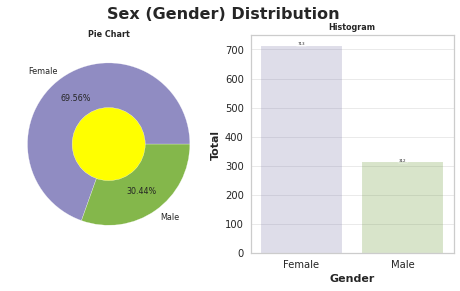

In [160]:
# --- Setting Colors, Labels, Order ---
labels=['Female', 'Male']
order=df['sex'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(8, 4))
plt.suptitle('Sex (Gender) Distribution', fontweight='heavy', 
             fontsize='16', fontfamily='sans-serif',)
# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=8,
          fontfamily='sans-serif',)
plt.pie(df['sex'].value_counts(), labels=labels, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8,),
        textprops={'fontsize':8})
centre=plt.Circle((0, 0), 0.45, fc='yellow',)
plt.gcf().gca().add_artist(centre)
# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=8, 
          fontfamily='sans-serif',)
ax = sns.countplot(x='sex', data=df, order=order, alpha=0.25)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=4, 
             bbox=dict(facecolor='none', 
                       linewidth=0.25, boxstyle='round'))
plt.xlabel('Gender', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           )
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
          )
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 25)
print('\033[1m'+'.: Sex (Gender) Total :.'+'\033[0m')
print('*' * 25)
df.sex.value_counts(dropna=False)


******************************
.: Chest Pain Type Total :.
******************************


0    497
2    284
1    167
3     77
Name: cp, dtype: int64

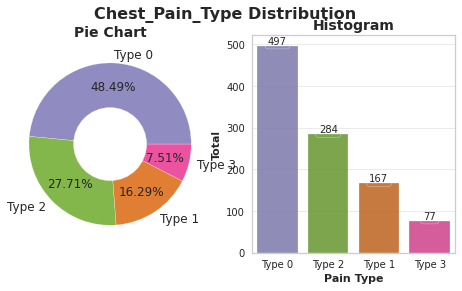

In [161]:
# --- Setting , Labels, Order ---
labels=['Type 0', 'Type 2', 'Type 1', 'Type 3']
order=df['cp'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(8, 4))
plt.suptitle('Chest_Pain_Type Distribution', fontweight='heavy', fontsize=16, 
             fontfamily='sans-serif',)

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,fontfamily='sans-serif', 
           )
plt.pie(df['cp'].value_counts(), labels=labels, pctdistance=0.7, 
        autopct='%.2f%%', textprops={'fontsize':12},
        wedgeprops=dict(alpha=0.8,))
centre=plt.Circle((0, 0), 0.45, fc='white',)
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          )
ax = sns.countplot(x='cp', data=df, order=order,
                alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Pain Type', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           )
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           )
plt.xticks([0, 1, 2, 3], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 30)
print('\033[1m'+'.: Chest Pain Type Total :.'+'\033[0m')
print('*' * 30)
df.cp.value_counts(dropna=False)

********************************
.: Fasting_Blood_Sugar Total :.
********************************


0    872
1    153
Name: fbs, dtype: int64

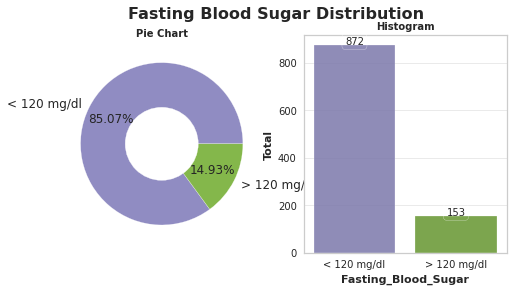

In [162]:
# --- Setting Labels, Order ---
labels=['< 120 mg/dl', '> 120 mg/dl']
order=df['fbs'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(8, 4))
plt.suptitle('Fasting Blood Sugar Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif',)

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=10, fontfamily='sans-serif', 
          )
plt.pie(df['fbs'].value_counts(), labels=labels, 
        wedgeprops=dict(alpha=0.8,), autopct='%.2f%%',
         pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white',)
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=10, fontfamily='sans-serif', 
          )
ax = sns.countplot(x='fbs', data=df,  order=order,
                    alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Fasting_Blood_Sugar', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif',)
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif',)
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 32)
print('\033[1m'+'.: Fasting_Blood_Sugar Total :.'+'\033[0m')
print('*' * 32)
df.fbs.value_counts(dropna=False)

**************************************************
.: Resting Electrocardiographic Results Total :.
**************************************************


1    513
0    497
2     15
Name: restecg, dtype: int64

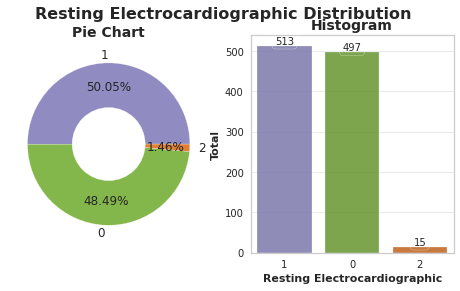

In [163]:
# --- Setting  Labels, Order ---
labels=['1', '0', '2']
order=df['restecg'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(8, 4))
plt.suptitle('Resting Electrocardiographic Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif',)

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', )
plt.pie(df['restecg'].value_counts(), labels=labels, 
        wedgeprops=dict(alpha=0.8), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', )
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          )
ax = sns.countplot(x='restecg', data=df, order=order,
                    alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', linewidth=0.25,
                         boxstyle='round'))

plt.xlabel('Resting Electrocardiographic', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif',)
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           )
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 50)
print('\033[1m'+'.: Resting Electrocardiographic Results Total :.'+'\033[0m')
print('*' * 50)
df.restecg.value_counts(dropna=False)

***********************************
.: Exercise Induced Angina Total :.
***********************************


0    680
1    345
Name: exang, dtype: int64

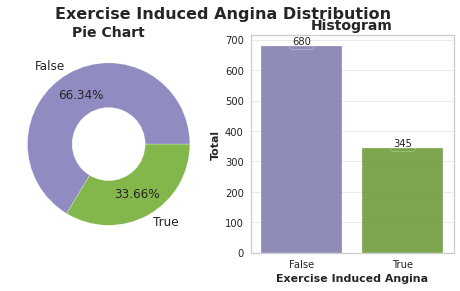

In [164]:
# --- Setting Colors, Labels, Order ---
labels=['False', 'True']
order=df['exang'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(8, 4))
plt.suptitle('Exercise Induced Angina Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', )

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          )
plt.pie(df['exang'].value_counts(), labels=labels, 
        wedgeprops=dict(alpha=0.8,), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white',)
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
        )
ax = sns.countplot(x='exang', data=df, order=order,
                   alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Exercise Induced Angina', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', )
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           )
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 35)
print('\033[1m'+'.: Exercise Induced Angina Total :.'+'\033[0m')
print('*' * 35)
df.exang.value_counts(dropna=False)

****************************************
.: Number of Major Vessels Total :.
****************************************


0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

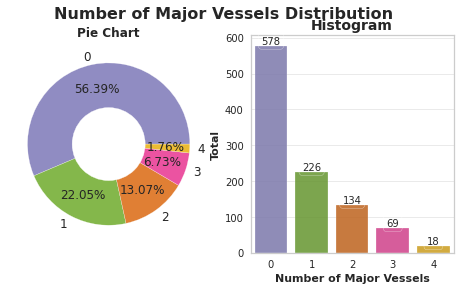

In [165]:
# --- Setting Colors, Labels, Order ---
labels=['0', '1', '2', '3', '4']
order=df['ca'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(8, 4))
plt.suptitle('Number of Major Vessels Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif',)

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=12, fontfamily='sans-serif',
          )
plt.pie(df['ca'].value_counts(), labels=labels,
        wedgeprops=dict(alpha=0.8,), 
        autopct='%.2f%%', pctdistance=0.7, textprops={'fontsize':12})

centre=plt.Circle((0, 0), 0.45, fc='white', )
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          )
ax = sns.countplot(x='ca', data=df,  order=order, alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none',  linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Number of Major Vessels', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', )
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           )
plt.grid(axis='y', alpha=0.4)
countplt
# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 40)
print('\033[1m'+'.: Number of Major Vessels Total :.'+'\033[0m')
print('*' * 40)
df.ca.value_counts(dropna=False)

********************
.: "thal" Total :.
********************


2    544
3    410
1     64
0      7
Name: thal, dtype: int64

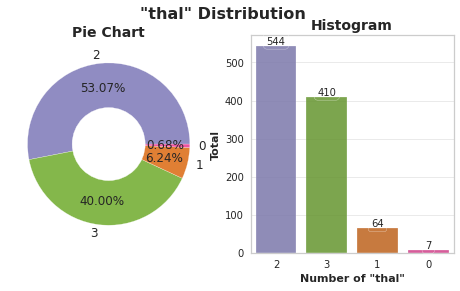

In [166]:
# --- Setting Colors, Labels, Order ---
labels=['2', '3', '1', '0']
order=df['thal'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(8,4))
plt.suptitle('"thal" Distribution', fontweight='heavy', fontsize=16, 
             fontfamily='sans-serif', )

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          )
plt.pie(df['thal'].value_counts(), labels=labels,  
        wedgeprops=dict(alpha=0.8, ), 
        autopct='%.2f%%', pctdistance=0.7, textprops={'fontsize':12})

centre=plt.Circle((0, 0), 0.45, fc='white', )
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          )
ax = sns.countplot(x='thal', data=df, order=order,
                    alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none',  linewidth=0.25,
                       boxstyle='round'))
    
plt.xlabel('Number of "thal"', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', )
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           )
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 20)
print('\033[1m'+'.: "thal" Total :.'+'\033[0m')
print('*' * 20)
df.thal.value_counts(dropna=False)

*********************************************
.: Heart Diseases Status (target) Total :.
*********************************************


1    526
0    499
Name: target, dtype: int64

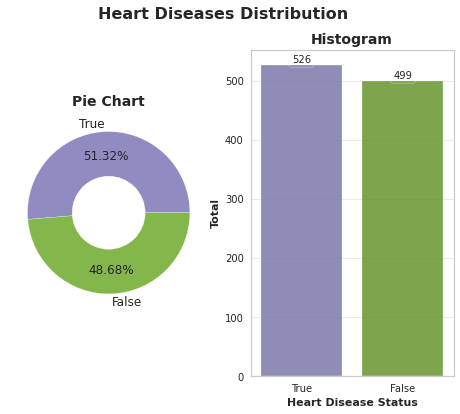

In [167]:
# --- Setting Colors, Labels, Order ---

labels=['True', 'False']
order=df['target'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(8,6))
plt.suptitle('Heart Diseases Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif',)

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',)
plt.pie(df['target'].value_counts(), labels=labels,
        wedgeprops=dict(alpha=0.8,), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white',)
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          )
ax = sns.countplot(x='target', data=df, order=order,
                    alpha=0.85)
for rect in ax.patches:
      ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Heart Disease Status', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', )
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           )
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 45)
print('\033[1m'+'.: Heart Diseases Status (target) Total :.'+'\033[0m')
print('*' * 45)
df.target.value_counts(dropna=False)

In [168]:
# --- Descriptive Statistics ---
df.select_dtypes(exclude='object').describe().T.style.background_gradient(cmap='Greens').set_properties(**{'font-family': 'Segoe UI'})

,count,mean,std,min,25%,50%,75%,max
age,1025.000000,54.434146,9.072290,29.000000,48.000000,56.000000,61.000000,77.000000
trestbps,1025.000000,131.611707,17.516718,94.000000,120.000000,130.000000,140.000000,200.000000
chol,1025.000000,246.000000,51.592510,126.000000,211.000000,240.000000,275.000000,564.000000
thalach,1025.000000,149.114146,23.005724,71.000000,132.000000,152.000000,166.000000,202.000000
oldpeak,1025.000000,1.071512,1.175053,0.000000,0.000000,0.800000,1.800000,6.200000
target,1025.000000,0.513171,0.500070,0.000000,0.000000,1.000000,1.000000,1.000000


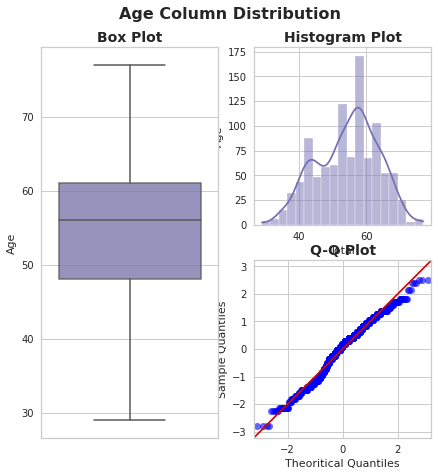

In [169]:
# --- Variable, Color & Plot Size ---
var = 'age'
fig=plt.figure(figsize=(7, 7))

# --- Skewness & Kurtosis ---
#print('\033[1m'+'.: Age Column Skewness & Kurtosis :.'+'\033[0m')
#print('*' * 40)
#print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
#print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
#print('\n')

# --- General Title ---
fig.suptitle('Age Column Distribution', fontweight='bold', fontsize=16, 
             fontfamily='sans-serif', )
fig.subplots_adjust(top=0.9)
# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', )
sns.histplot(data=df, x=var, kde=True, )
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', )
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='sans-serif', 
           )
# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', )
qqplot(df[var], fit=True, line='45', ax=ax_2, 
        alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', )
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif',)


# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          )
sns.boxplot(data=df, y=var,  boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='sans-serif', 
           )

plt.show()

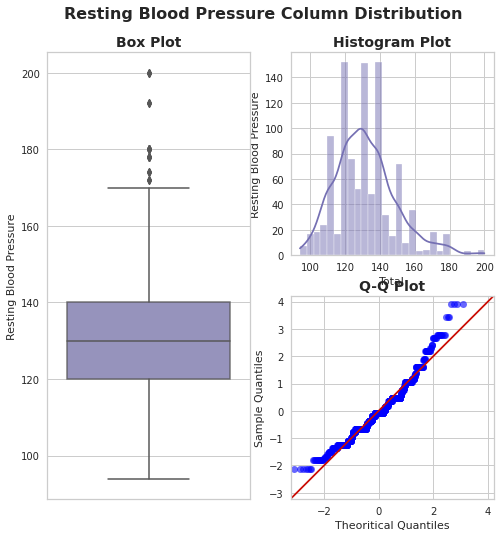

In [170]:
# --- Variable, Color & Plot Size ---
var = 'trestbps'
fig=plt.figure(figsize=(8, 8))

# --- Skewness & Kurtosis ---
#print('\033[1m'+'.: Resting Blood Pressure Column Skewness & Kurtosis :.'+'\033[0m')
#print('*' * 55)
#print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
#print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
#print('\n')
# --- General Title ---
fig.suptitle('Resting Blood Pressure Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif', )
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', )
sns.histplot(data=df, x=var, kde=True, )
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', )
plt.ylabel('Resting Blood Pressure', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif',)
# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', )
qqplot(df[var], fit=True, line='45', ax=ax_2,  
        alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', )
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', )
# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          )
sns.boxplot(data=df, y=var,  boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Resting Blood Pressure', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', )

plt.show()

.: Serum Cholestoral Column Skewness & Kurtosis :.
*********************************************
Skewness: 1.074
Kurtosis: 3.997




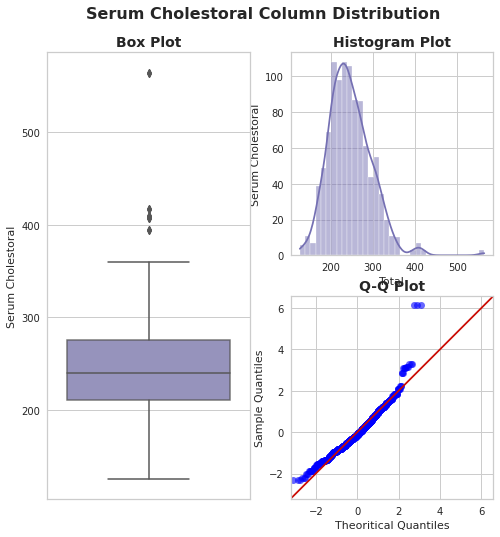

In [171]:
# --- Variable, Color & Plot Size ---
var = 'chol'
fig=plt.figure(figsize=(8, 8))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Serum Cholestoral Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 45)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')
# --- General Title ---
fig.suptitle('Serum Cholestoral Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif', )
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', )
sns.histplot(data=df, x=var, kde=True, )
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', )
plt.ylabel('Serum Cholestoral', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', )
# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
        )
qqplot(df[var], fit=True, line='45', ax=ax_2, 
        alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', )
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', )
# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', )
sns.boxplot(data=df, y=var,  boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Serum Cholestoral', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', )

plt.show()

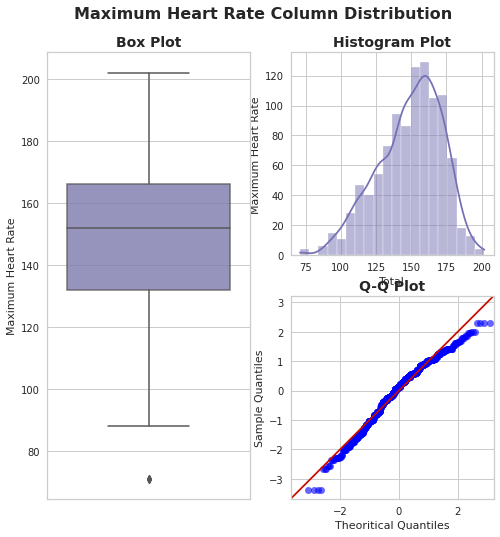

In [172]:
# --- Variable, Color & Plot Size ---
var = 'thalach'
fig=plt.figure(figsize=(8, 8))

# --- Skewness & Kurtosis ---
#print('\033[1m'+'.: Maximum Heart Rate Column Skewness & Kurtosis :.'+'\033[0m')
#print('*' * 50)
#print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
#print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
#print('\n')

# --- General Title ---
fig.suptitle('Maximum Heart Rate Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif', )
fig.subplots_adjust(top=0.9)
# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', )
sns.histplot(data=df, x=var, kde=True, )
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', )
plt.ylabel('Maximum Heart Rate', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', )

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          )
qqplot(df[var], fit=True, line='45', ax=ax_2, 
        alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', )
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', )

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', )
sns.boxplot(data=df, y=var, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Maximum Heart Rate', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', )

plt.show()

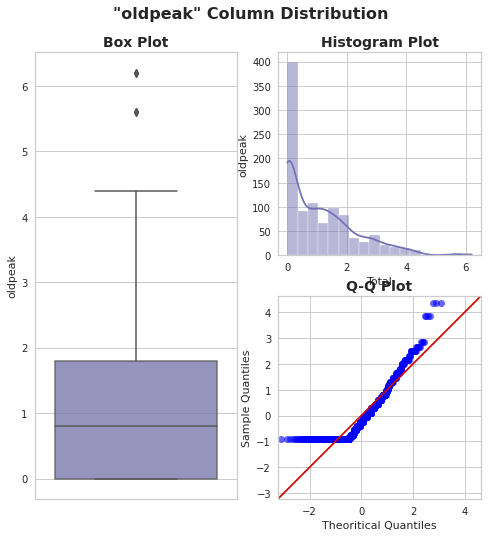

In [173]:
# --- Variable, Color & Plot Size ---
var = 'oldpeak'

fig=plt.figure(figsize=(8, 8))

# --- Skewness & Kurtosis ---
#print('\033[1m'+'.: "oldpeak" Column Skewness & Kurtosis :.'+'\033[0m')
#print('*' * 40)
#print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
#print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
#print('\n')

# --- General Title ---
fig.suptitle('"oldpeak" Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif', )
fig.subplots_adjust(top=0.9)
# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', )
sns.histplot(data=df, x=var, kde=True,)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', )
plt.ylabel('oldpeak', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', )

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
        )
qqplot(df[var], fit=True, line='45', ax=ax_2, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', )
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', )

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', )
sns.boxplot(data=df, y=var, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('oldpeak', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', )

plt.show()

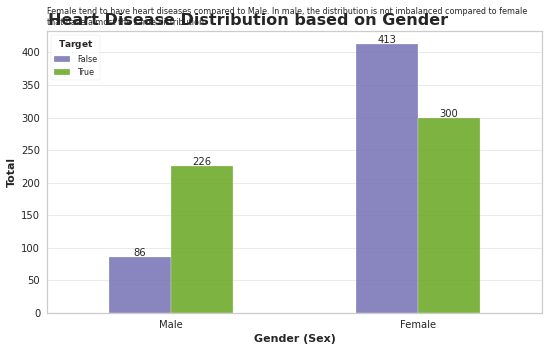

In [174]:
# --- Labels Settings ---
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['Male', 'Female']

# --- Creating Bar Chart ---
ax = pd.crosstab(df.sex, df.target).plot(kind='bar', figsize=(8, 5), alpha=0.85)
# --- Bar Chart Settings ---
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+1.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10)

plt.suptitle('Heart Disease Distribution based on Gender', fontweight='heavy', 
             x=0.065, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif', 
               )
plt.title('Female tend to have heart diseases compared to Male. In male, the distribution is not imbalanced compared to female\nthat have almost the same distribution', 
          fontsize='8', fontfamily='sans-serif', loc='left', )
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Gender (Sex)', fontfamily='sans-serif', fontweight='bold', 
           )
plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold', 
           )
plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', 
           title_fontsize='9', loc='upper left', frameon=True);


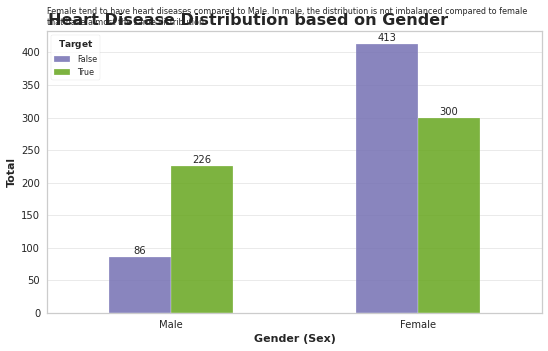

In [175]:
ender = np.array([0, 1])
label_gender = np.array([0, 1])

label_gender2 = ['Male', 'Female']

# --- Creating Bar Chart ---
ax = pd.crosstab(df.sex, df.target).plot(kind='bar', figsize=(8, 5), 
                                         
                                         alpha=0.85)
# --- Bar Chart Settings ---
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10)
    plt.suptitle('Heart Disease Distribution based on Gender', fontweight='heavy', 
             x=0.065, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif', 
             )
plt.title('Female tend to have heart diseases compared to Male. In male, the distribution is not imbalanced compared to female\nthat have almost the same distribution', 
          fontsize='8', fontfamily='sans-serif', loc='left',)
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Gender (Sex)', fontfamily='sans-serif', fontweight='bold', 
           )
plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold', 
           )
plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', 
           title_fontsize='9', loc='upper left', frameon=True);

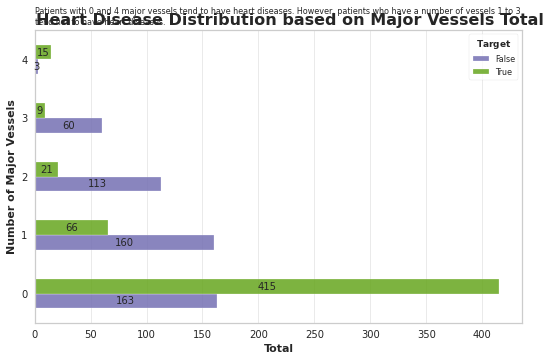

In [176]:
# --- Labels Settings ---
labels = ['False', 'True']

# --- Creating Horizontal Bar Chart ---
ax = pd.crosstab(df.ca, df.target).plot(kind='barh', figsize=(8, 5), 
                                         
                            alpha=0.85)
# --- Horizontal Bar Chart Settings ---
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width/2, y+height/2, '{:.0f}'.format(width), 
             horizontalalignment='center', verticalalignment='center')

plt.suptitle('Heart Disease Distribution based on Major Vessels Total', 
             fontweight='heavy', x=0.069, y=0.98, ha='left', fontsize='16', 
             fontfamily='sans-serif', )
plt.title('Patients with 0 and 4 major vessels tend to have heart diseases. However, patients who have a number of vessels 1 to 3\ntend not to have heart diseases.', 
                    fontsize='8', fontfamily='sans-serif', loc='left', )
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Total', fontfamily='sans-serif', fontweight='bold', )
plt.ylabel('Number of Major Vessels', fontfamily='sans-serif', fontweight='bold', 
        )
plt.yticks(rotation=0)
plt.grid(axis='x', alpha=0.4)
plt.grid(axis='y', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', frameon=True,
           title_fontsize='9', loc='upper right');

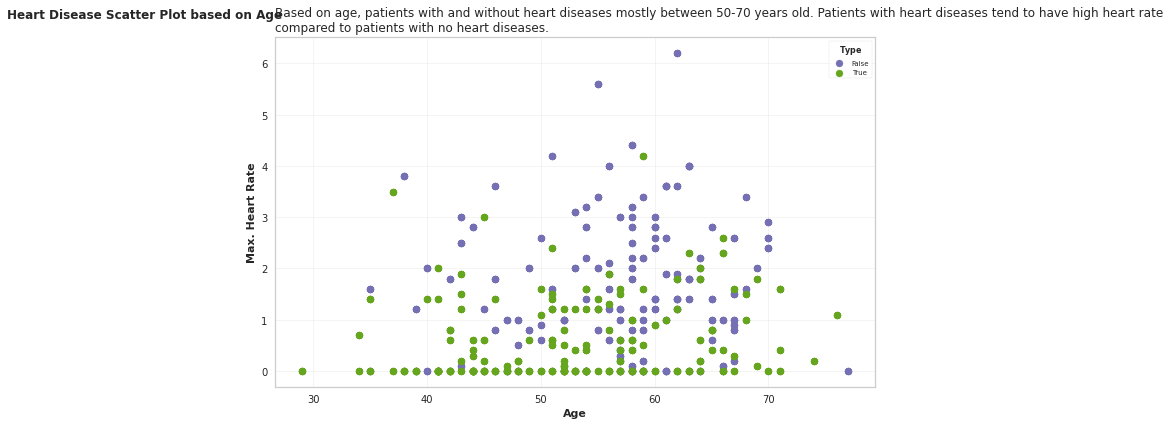

In [177]:
# -- Scatter Plot Size & Titles Settings ---
plt.figure(figsize=(12, 6))
plt.suptitle('Heart Disease Scatter Plot based on Age', fontweight='heavy', 
             x=0.048, y=0.98, fontsize='12', ha='right', fontfamily='sans-serif', 
             )
plt.title('Based on age, patients with and without heart diseases mostly between 50-70 years old. Patients with heart diseases tend to have high heart rate\ncompared to patients with no heart diseases.', 
          fontsize='12', fontfamily='sans-serif', loc='left', )
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

# --- Creating Scatter Plot ---
plt.scatter(x=df.age[df.target==0], y=df.oldpeak[(df.target==0)], )
plt.scatter(x=df.age[df.target==1], y=df.oldpeak[(df.target==1)],)
# --- Scatter Plot Legend & Labels Settings ---
plt.legend(['False', 'True'], title='$\\bf{Type}$', fontsize='7', 
           title_fontsize='8', loc='upper right', frameon=True)
plt.xlabel('Age', fontweight='bold', fontsize='11',
           fontfamily='sans-serif', )
plt.ylabel('Max. Heart Rate', fontweight='bold', fontsize='11', 
           fontfamily='sans-serif', )
plt.ticklabel_format(style='plain', axis='both')
plt.grid(axis='both', alpha=0.4, lw=0.5)
plt.show();


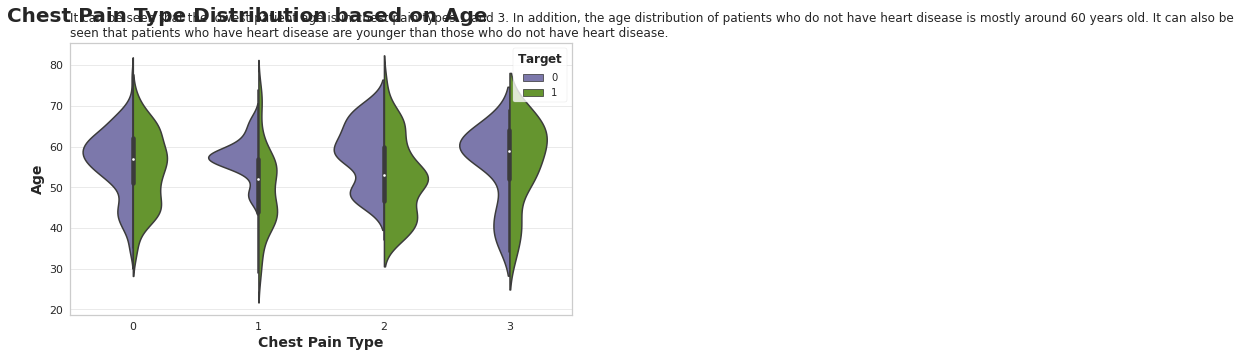

In [178]:
# -- Violin Plot Size & Titles Settings ---
fig, ax = plt.subplots()
fig.set_size_inches(9, 5)
plt.suptitle('Chest Pain Type Distribution based on Age', fontweight='heavy', 
             x=0.028, y=0.98, ha='left', fontsize='20', fontfamily='sans-serif', 
             )
plt.title('It can be seen that the lowest patient age is in chest pain types 1 and 3. In addition, the age distribution of patients who do not have heart disease is mostly around 60 years old. It can also be\nseen that patients who have heart disease are younger than those who do not have heart disease.', 
          fontsize='12', fontfamily='sans-serif', loc='left', )
plt.tight_layout(rect=[0, 0.04, 1, 1.01])
# --- Creating Violin Plot based on Type ---
sns.violinplot(x='cp', y='age', hue='target', data=df, ax=ax, 
                boxprops=dict(alpha=0.9), linewidth=1.5, 
               split=True)

# --- Violin Plot Legend & Labels Settings ---
plt.legend(title='$\\bf{Target}$', fontsize='10', title_fontsize='12', frameon=True,
           loc='upper right')
plt.xlabel('Chest Pain Type', fontweight='bold', fontsize='14', 
           fontfamily='sans-serif', )
plt.ylabel('Age', fontweight='bold', fontsize='14', fontfamily='sans-serif', 
           )
plt.xticks(fontsize='11')
plt.yticks(fontsize='11')
plt.grid(axis='y', alpha=0.4)
plt.show();

********************************
.: Fasting Blood Sugar Total :.
********************************


0    872
1    153
Name: fbs, dtype: int64

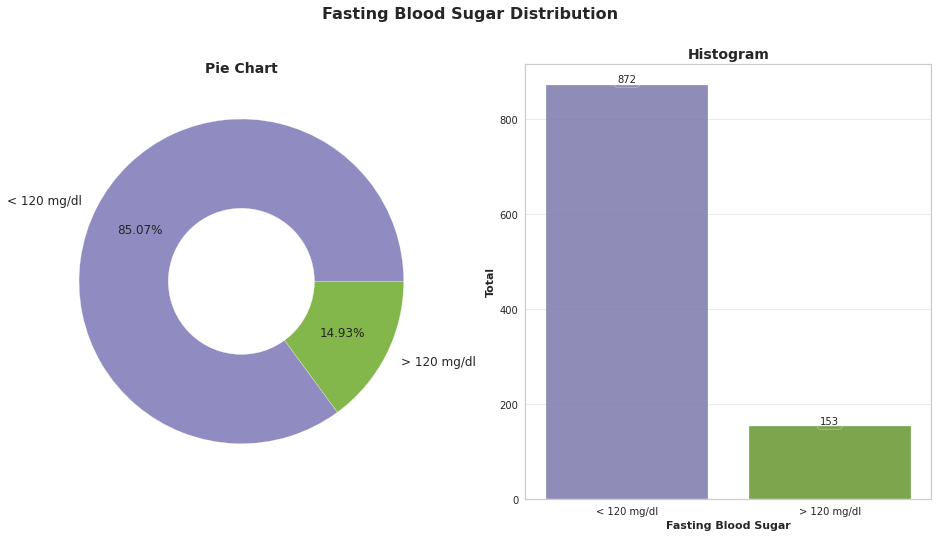

In [179]:
# --- Setting Colors, Labels, Order ---
labels=['< 120 mg/dl', '> 120 mg/dl']
order=df['fbs'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Fasting Blood Sugar Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif',)

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
        )
plt.pie(df['fbs'].value_counts(), labels=labels,
        wedgeprops=dict(alpha=0.8, ), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', )
plt.gcf().gca().add_artist(centre)
# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          )
ax = sns.countplot(x='fbs', data=df,  order=order,
                   alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none',  linewidth=0.25,
                       boxstyle='round'))
plt.xlabel('Fasting Blood Sugar', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', )
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           )
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 32)
print('\033[1m'+'.: Fasting Blood Sugar Total :.'+'\033[0m')
print('*' * 32)
df.fbs.value_counts(dropna=False)


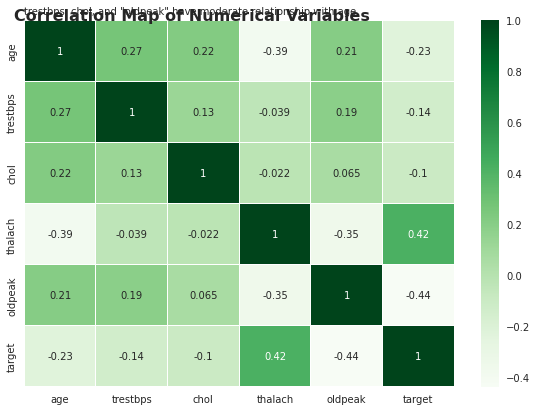

In [180]:
# --- Correlation Map (Heatmap) ---
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='Greens', linewidths=0.1)
plt.suptitle('Correlation Map of Numerical Variables', fontweight='heavy', 
             x=0.03, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif', 
             )
plt.title('trestbps, chol, and "oldpeak" have moderate relationship with age.', 
          fontsize='10', fontfamily='sans-serif', loc='left', )
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

In [181]:
# --- Creating Dummy Variables for cp, thal and slope ---
cp = pd.get_dummies(df['cp'], prefix='cp')
thal = pd.get_dummies(df['oldpeak'], prefix='oldpeak')
slope = pd.get_dummies(df['slope'], prefix='slope')

# --- Merge Dummy Variables to Main Data Frame ---
frames = [df, cp, thal, slope]
df = pd.concat(frames, axis = 1)

In [182]:
# --- Display New Data Frame ---
df.head().style.background_gradient(cmap='Greens').hide_index().set_properties(**{'font-family': 'Segoe UI'})

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3,oldpeak_0.0,oldpeak_0.1,oldpeak_0.2,oldpeak_0.3,oldpeak_0.4,oldpeak_0.5,oldpeak_0.6,oldpeak_0.7,oldpeak_0.8,oldpeak_0.9,oldpeak_1.0,oldpeak_1.1,oldpeak_1.2,oldpeak_1.3,oldpeak_1.4,oldpeak_1.5,oldpeak_1.6,oldpeak_1.8,oldpeak_1.9,oldpeak_2.0,oldpeak_2.1,oldpeak_2.2,oldpeak_2.3,oldpeak_2.4,oldpeak_2.5,oldpeak_2.6,oldpeak_2.8,oldpeak_2.9,oldpeak_3.0,oldpeak_3.1,oldpeak_3.2,oldpeak_3.4,oldpeak_3.5,oldpeak_3.6,oldpeak_3.8,oldpeak_4.0,oldpeak_4.2,oldpeak_4.4,oldpeak_5.6,oldpeak_6.2,slope_0,slope_1,slope_2
52,1,0,125,212,0,1,168,0,1.000000,2,2,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
53,1,0,140,203,1,0,155,1,3.100000,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
70,1,0,145,174,0,1,125,1,2.600000,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
61,1,0,148,203,0,1,161,0,0.000000,2,1,3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
62,0,0,138,294,1,1,106,0,1.900000,1,3,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [183]:
#--- Drop Unnecessary Variables ---
# df = df.drop(columns = ['cp', 'thal' 'slope'])

In [184]:
# --- Display New Data Frame ---
df.head().style.background_gradient(cmap='Greens').hide_index().set_properties(**{'font-family': 'Segoe UI'})

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3,oldpeak_0.0,oldpeak_0.1,oldpeak_0.2,oldpeak_0.3,oldpeak_0.4,oldpeak_0.5,oldpeak_0.6,oldpeak_0.7,oldpeak_0.8,oldpeak_0.9,oldpeak_1.0,oldpeak_1.1,oldpeak_1.2,oldpeak_1.3,oldpeak_1.4,oldpeak_1.5,oldpeak_1.6,oldpeak_1.8,oldpeak_1.9,oldpeak_2.0,oldpeak_2.1,oldpeak_2.2,oldpeak_2.3,oldpeak_2.4,oldpeak_2.5,oldpeak_2.6,oldpeak_2.8,oldpeak_2.9,oldpeak_3.0,oldpeak_3.1,oldpeak_3.2,oldpeak_3.4,oldpeak_3.5,oldpeak_3.6,oldpeak_3.8,oldpeak_4.0,oldpeak_4.2,oldpeak_4.4,oldpeak_5.6,oldpeak_6.2,slope_0,slope_1,slope_2
52,1,0,125,212,0,1,168,0,1.000000,2,2,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
53,1,0,140,203,1,0,155,1,3.100000,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
70,1,0,145,174,0,1,125,1,2.600000,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
61,1,0,148,203,0,1,161,0,0.000000,2,1,3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
62,0,0,138,294,1,1,106,0,1.900000,1,3,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [185]:
# --- Seperating Dependent Features ---
x = df.drop(['target'], axis=1)
y = df['target']

In [186]:
# --- Data Normalization using Min-Max Method ---
x = MinMaxScaler().fit_transform(x)

In [187]:
# --- Splitting Dataset into 80:20 ---
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [188]:
# --- Applying Logistic Regression ---
LRclassifier = LogisticRegression(max_iter=1000, random_state=1, solver='liblinear', penalty='l1')
LRclassifier.fit(x_train, y_train)

y_pred_LR = LRclassifier.predict(x_test)

.:. Logistic Regression Accuracy: 81.46% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       107
           1       0.76      0.89      0.82        98

    accuracy                           0.81       205
   macro avg       0.82      0.82      0.81       205
weighted avg       0.82      0.81      0.81       205


.: Performance Evaluation
**************************


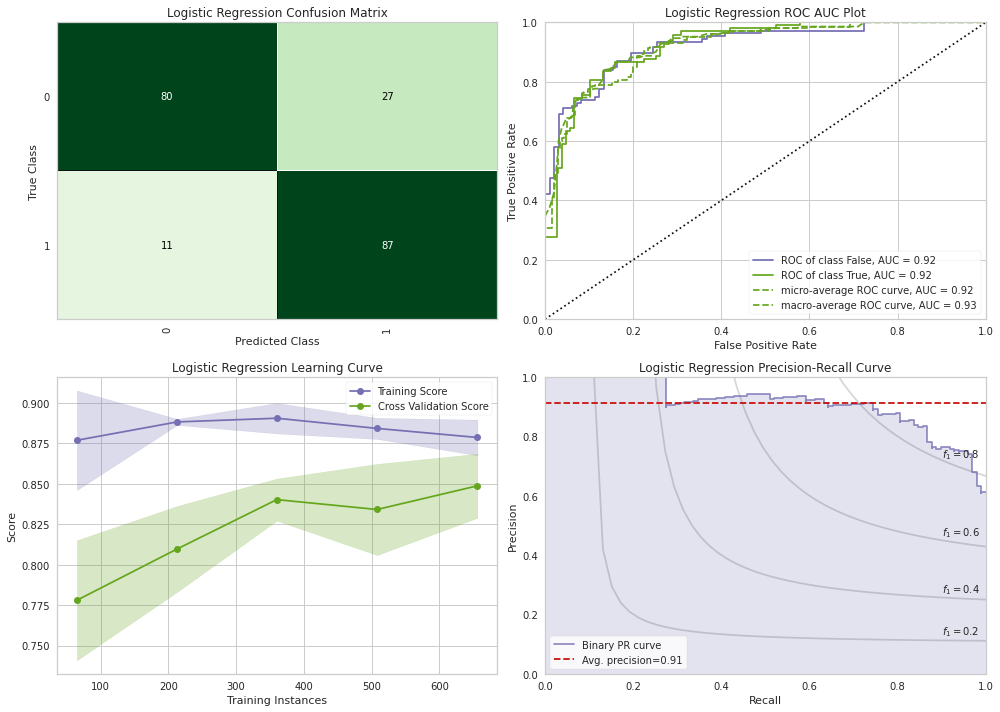

In [189]:
# --- LR Accuracy ---
LRAcc = accuracy_score(y_pred_LR, y_test)
print('.:. Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(LRAcc*100)+' .:.')

# --- LR Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_LR))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))
# --- LR Confusion Matrix ---
logmatrix = ConfusionMatrix(LRclassifier, ax=ax1, cmap='Greens',
                            title='Logistic Regression Confusion Matrix')
logmatrix.fit(x_train, y_train)
logmatrix.score(x_test, y_test)
logmatrix.finalize()

# --- LR ROC AUC ---
logrocauc = ROCAUC(LRclassifier, classes=['False', 'True'], ax=ax2,
                   title='Logistic Regression ROC AUC Plot')
logrocauc.fit(x_train, y_train)
logrocauc.score(x_test, y_test)
logrocauc.finalize()
# --- LR Learning Curve ---
loglc = LearningCurve(LRclassifier, ax=ax3, title='Logistic Regression Learning Curve')
loglc.fit(x_train, y_train)
loglc.finalize()

# --- LR Precision Recall Curve ---
logcurve = PrecisionRecallCurve(LRclassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Logistic Regression Precision-Recall Curve')
logcurve.fit(x_train, y_train)
logcurve.score(x_test, y_test)
logcurve.finalize()

plt.tight_layout();


In [190]:
# --- Applying KNN ---
KNNClassifier = KNeighborsClassifier(n_neighbors=3)
KNNClassifier.fit(x_train, y_train)

y_pred_KNN = KNNClassifier.predict(x_test)

.:. K-Nearest Neighbour Accuracy: 95.12% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       107
           1       0.94      0.96      0.95        98

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205


.: Performance Evaluation
**************************


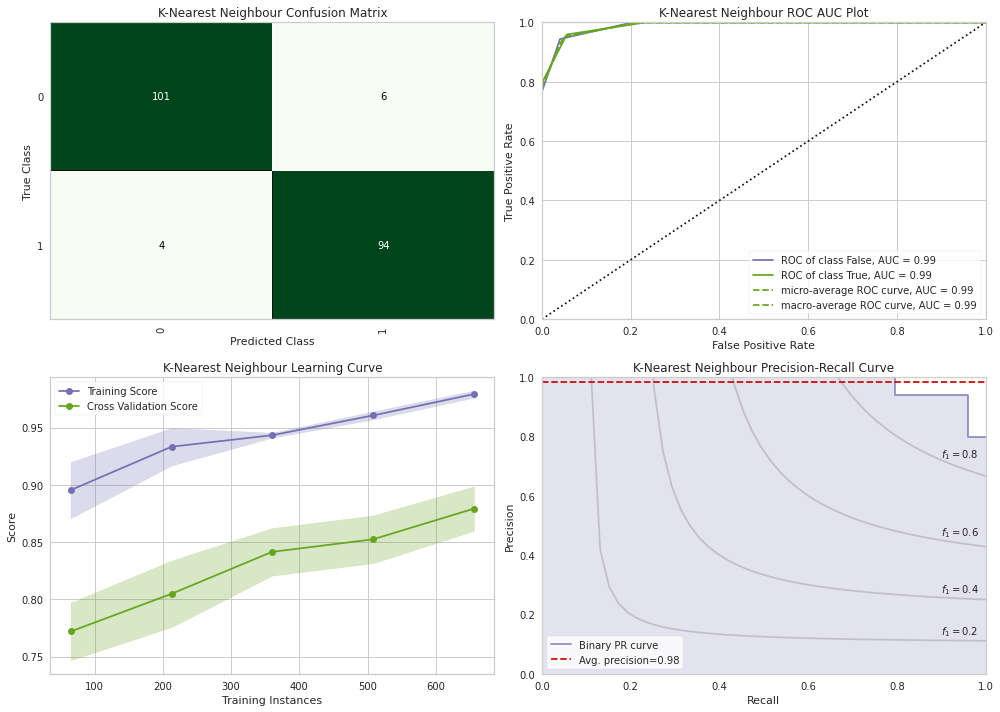

In [191]:
# --- KNN Accuracy ---
KNNAcc = accuracy_score(y_pred_KNN, y_test)
print('.:. K-Nearest Neighbour Accuracy:'+'\033[1m {:.2f}%'.format(KNNAcc*100)+' .:.')

# --- KNN Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_KNN))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))
# --- KNN Confusion Matrix ---
knnmatrix = ConfusionMatrix(KNNClassifier, ax=ax1, cmap='Greens',
                            title='K-Nearest Neighbour Confusion Matrix')
knnmatrix.fit(x_train, y_train)
knnmatrix.score(x_test, y_test)
knnmatrix.finalize()

# --- KNN ROC AUC ---
knnrocauc = ROCAUC(KNNClassifier, classes=['False', 'True'], ax=ax2,
                   title='K-Nearest Neighbour ROC AUC Plot')
knnrocauc.fit(x_train, y_train)
knnrocauc.score(x_test, y_test)
knnrocauc.finalize()

# --- KNN Learning Curve ---
knnlc = LearningCurve(KNNClassifier, ax=ax3, title='K-Nearest Neighbour Learning Curve')
knnlc.fit(x_train, y_train)
knnlc.finalize()

# --- KNN Precision Recall Curve ---
knncurve = PrecisionRecallCurve(KNNClassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                 title='K-Nearest Neighbour Precision-Recall Curve')
knncurve.fit(x_train, y_train)
knncurve.score(x_test, y_test)
knncurve.finalize()

plt.tight_layout();

In [192]:
# --- Applying SVM ---
SVMclassifier = SVC(kernel='linear', max_iter=1000, C=10, probability=True)
SVMclassifier.fit(x_train, y_train)

y_pred_SVM = SVMclassifier.predict(x_test)

.:. Support Vector Machine Accuracy: 82.44% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.92      0.73      0.81       107
           1       0.76      0.93      0.83        98

    accuracy                           0.82       205
   macro avg       0.84      0.83      0.82       205
weighted avg       0.84      0.82      0.82       205


.: Performance Evaluation
**************************


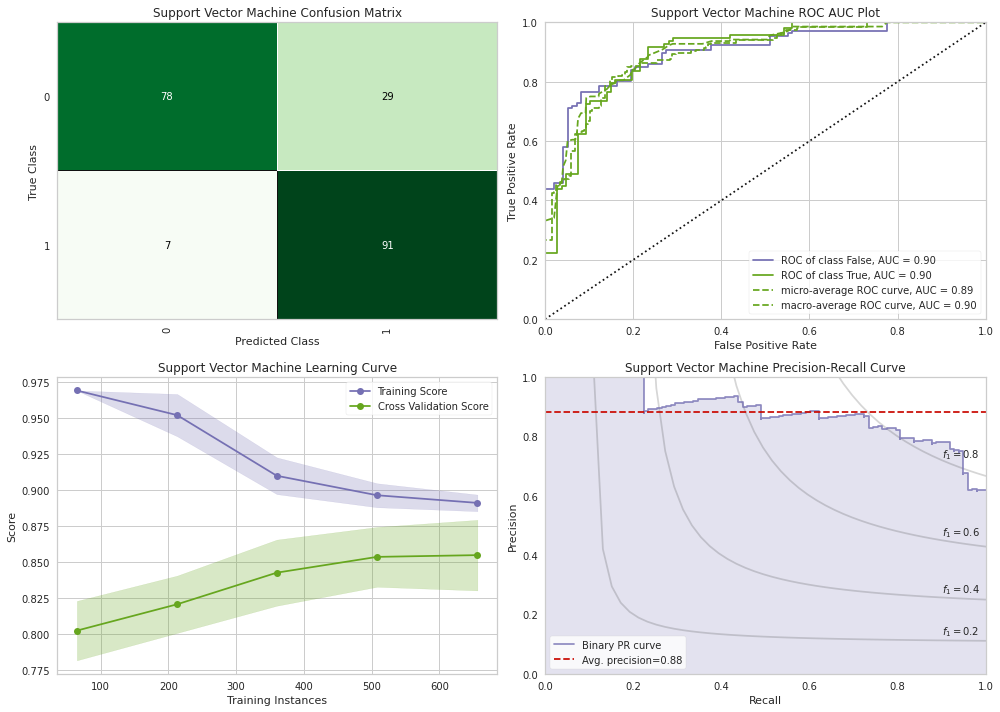

In [193]:
# --- SVM Accuracy ---
SVMAcc = accuracy_score(y_pred_SVM, y_test)
print('.:. Support Vector Machine Accuracy:'+'\033[1m {:.2f}%'.format(SVMAcc*100)+' .:.')

# --- SVM Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_SVM))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- SVM Confusion Matrix ---
svmmatrix = ConfusionMatrix(SVMclassifier, ax=ax1, cmap='Greens',
                            title='Support Vector Machine Confusion Matrix')
svmmatrix.fit(x_train, y_train)
svmmatrix.score(x_test, y_test)
svmmatrix.finalize()

# --- SVM ROC AUC ---
svmrocauc = ROCAUC(SVMclassifier, classes=['False', 'True'], ax=ax2,
                   title='Support Vector Machine ROC AUC Plot')
svmrocauc.fit(x_train, y_train)
svmrocauc.score(x_test, y_test)
svmrocauc.finalize()

# --- SVM Learning Curve ---
svmlc = LearningCurve(SVMclassifier, ax=ax3, title='Support Vector Machine Learning Curve')
svmlc.fit(x_train, y_train)
svmlc.finalize()

# --- SVM Precision Recall Curve ---
svmcurve = PrecisionRecallCurve(SVMclassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Support Vector Machine Precision-Recall Curve')
svmcurve.fit(x_train, y_train)
svmcurve.score(x_test, y_test)
svmcurve.finalize()

plt.tight_layout();

In [194]:
# --- Applying Gaussian NB ---
GNBclassifier = GaussianNB(var_smoothing=0.1)
GNBclassifier.fit(x_train, y_train)

y_pred_GNB = GNBclassifier.predict(x_test)

.:. Gaussian Naive Bayes Accuracy: 76.10% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.87      0.64      0.74       107
           1       0.69      0.90      0.78        98

    accuracy                           0.76       205
   macro avg       0.78      0.77      0.76       205
weighted avg       0.79      0.76      0.76       205


.: Performance Evaluation
**************************


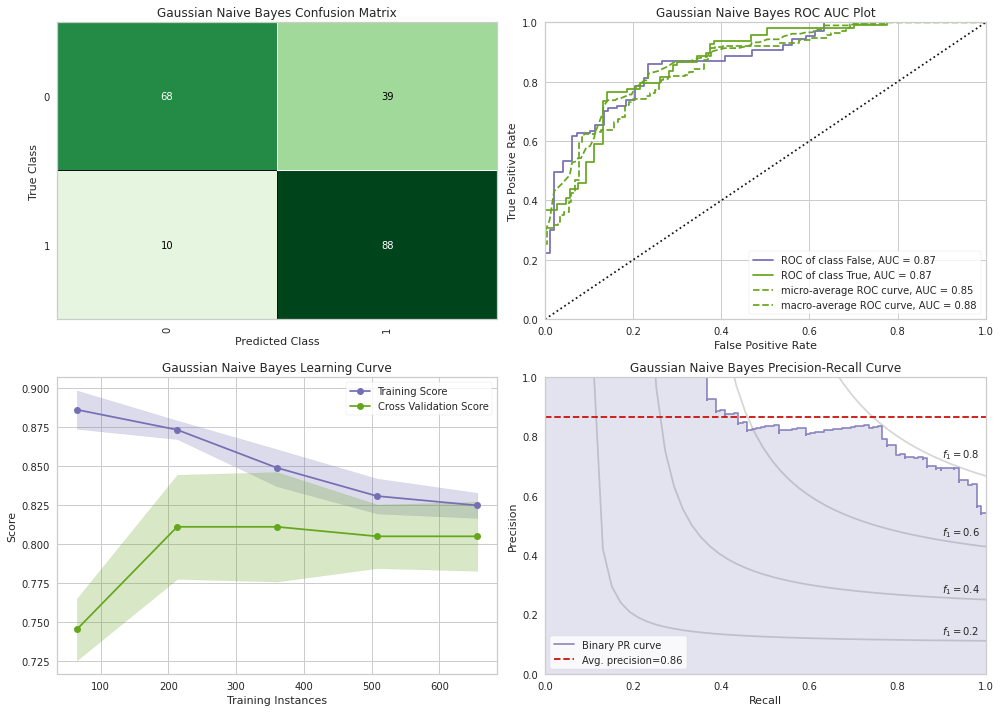

In [195]:
# --- GNB Accuracy ---
GNBAcc = accuracy_score(y_pred_GNB, y_test)
print('.:. Gaussian Naive Bayes Accuracy:'+'\033[1m {:.2f}%'.format(GNBAcc*100)+' .:.')

# --- GNB Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_GNB))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))
# --- GNB Confusion Matrix ---
gnbmatrix = ConfusionMatrix(GNBclassifier, ax=ax1, cmap='Greens',
                            title='Gaussian Naive Bayes Confusion Matrix')
gnbmatrix.fit(x_train, y_train)
gnbmatrix.score(x_test, y_test)
gnbmatrix.finalize()

# --- GNB ROC AUC ---
gnbrocauc = ROCAUC(GNBclassifier, classes=['False', 'True'], ax=ax2,
                   title='Gaussian Naive Bayes ROC AUC Plot')
gnbrocauc.fit(x_train, y_train)
gnbrocauc.score(x_test, y_test)
gnbrocauc.finalize()
# --- GNB Learning Curve ---
gnblc = LearningCurve(GNBclassifier, ax=ax3, title='Gaussian Naive Bayes Learning Curve')
gnblc.fit(x_train, y_train)
gnblc.finalize()

# --- GNB Precision Recall Curve ---
gnbcurve = PrecisionRecallCurve(GNBclassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Gaussian Naive Bayes Precision-Recall Curve')
gnbcurve.fit(x_train, y_train)
gnbcurve.score(x_test, y_test)
gnbcurve.finalize()

plt.tight_layout()

In [196]:
# --- Applying Decision Tree ---
DTCclassifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, criterion='entropy', min_samples_split=5,
                                       splitter='random', random_state=1)

DTCclassifier.fit(x_train, y_train)
y_pred_DTC = DTCclassifier.predict(x_test)

.:. Decision Tree Accuracy: 79.02% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       107
           1       0.77      0.81      0.79        98

    accuracy                           0.79       205
   macro avg       0.79      0.79      0.79       205
weighted avg       0.79      0.79      0.79       205


.: Performance Evaluation
**************************


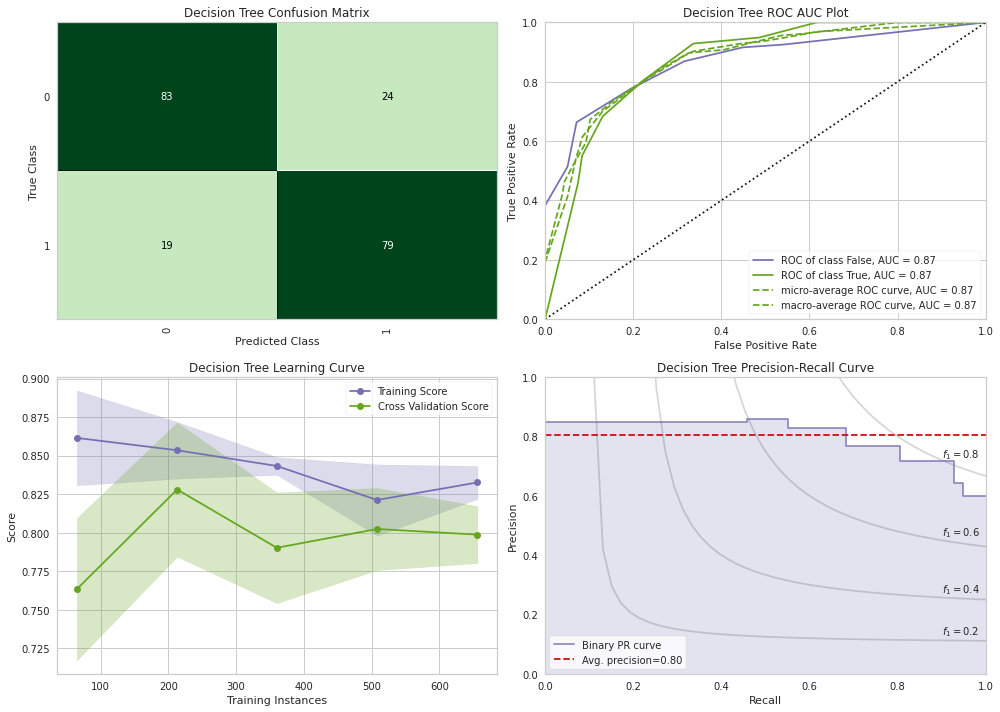

In [197]:
# --- Decision Tree Accuracy ---
DTCAcc = accuracy_score(y_pred_DTC, y_test)
print('.:. Decision Tree Accuracy:'+'\033[1m {:.2f}%'.format(DTCAcc*100)+' .:.')

# --- Decision Tree Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_DTC))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))
# --- Decision Tree Confusion Matrix ---
dtcmatrix = ConfusionMatrix(DTCclassifier, ax=ax1, cmap='Greens',
                            title='Decision Tree Confusion Matrix')
dtcmatrix.fit(x_train, y_train)
dtcmatrix.score(x_test, y_test)
dtcmatrix.finalize()

# --- Decision Tree ROC AUC ---
dtcrocauc = ROCAUC(DTCclassifier, classes=['False', 'True'], ax=ax2,
                   title='Decision Tree ROC AUC Plot')
dtcrocauc.fit(x_train, y_train)
dtcrocauc.score(x_test, y_test)
dtcrocauc.finalize()
# --- Decision Tree Learning Curve ---
dtclc = LearningCurve(DTCclassifier, ax=ax3, title='Decision Tree Learning Curve')
dtclc.fit(x_train, y_train)
dtclc.finalize()

# --- Decision Tree Precision Recall Curve ---
dtccurve = PrecisionRecallCurve(DTCclassifier, ax=ax4, ap_score=True, iso_f1_curves=True, 
                                title='Decision Tree Precision-Recall Curve')
dtccurve.fit(x_train, y_train)
dtccurve.score(x_test, y_test)
dtccurve.finalize()

plt.tight_layout();

In [198]:
# --- Applying Random Forest ---
RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15)

RFclassifier.fit(x_train, y_train)
y_pred_RF = RFclassifier.predict(x_test)

.:. Random Forest Accuracy: 88.29% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       107
           1       0.83      0.95      0.89        98

    accuracy                           0.88       205
   macro avg       0.89      0.89      0.88       205
weighted avg       0.89      0.88      0.88       205


.: Performance Evaluation
**************************


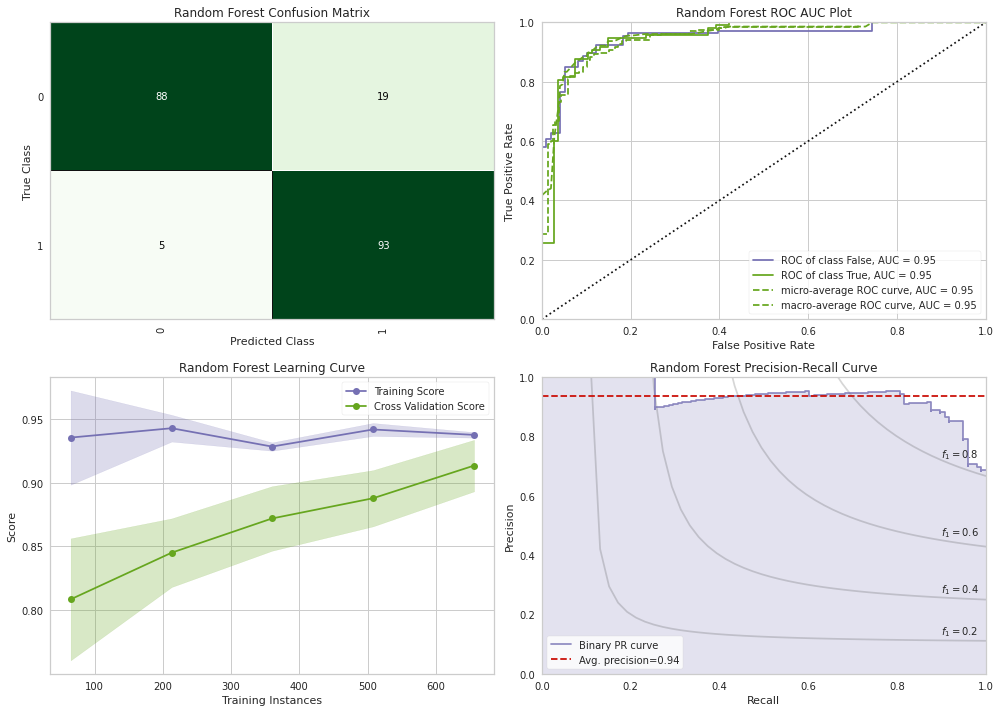

In [199]:
# --- Random Forest Accuracy ---
RFAcc = accuracy_score(y_pred_RF, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.2f}%'.format(RFAcc*100)+' .:.')

# --- Random FOrest Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_RF))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- Random Forest Confusion Matrix ---
rfcmatrix = ConfusionMatrix(RFclassifier, ax=ax1, cmap='Greens',
                            title='Random Forest Confusion Matrix')
rfcmatrix.fit(x_train, y_train)
rfcmatrix.score(x_test, y_test)
rfcmatrix.finalize()

# --- Random Forest ROC AUC ---
rccrocauc = ROCAUC(RFclassifier, classes=['False', 'True'], ax=ax2,
                   title='Random Forest ROC AUC Plot')
rccrocauc.fit(x_train, y_train)
rccrocauc.score(x_test, y_test)
rccrocauc.finalize()

# --- Random Forest Learning Curve ---
rcclc = LearningCurve(RFclassifier, ax=ax3, title='Random Forest Learning Curve')
rcclc.fit(x_train, y_train)
rcclc.finalize()

# --- Random Forest Precision Recall Curve ---
rcccurve = PrecisionRecallCurve(RFclassifier, ax=ax4, ap_score=True, iso_f1_curves=True, 
                                title='Random Forest Precision-Recall Curve')
rcccurve.fit(x_train, y_train)
rcccurve.score(x_test, y_test)
rcccurve.finalize()

plt.tight_layout();

In [200]:
# --- Applying AdaBoost ---
ABclassifier = AdaBoostClassifier(n_estimators=3)

ABclassifier.fit(x_train, y_train)
y_pred_AB = ABclassifier.predict(x_test)

.:. AdaBoost Accuracy: 81.46% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.86      0.78      0.81       107
           1       0.78      0.86      0.82        98

    accuracy                           0.81       205
   macro avg       0.82      0.82      0.81       205
weighted avg       0.82      0.81      0.81       205


.: Performance Evaluation
**************************


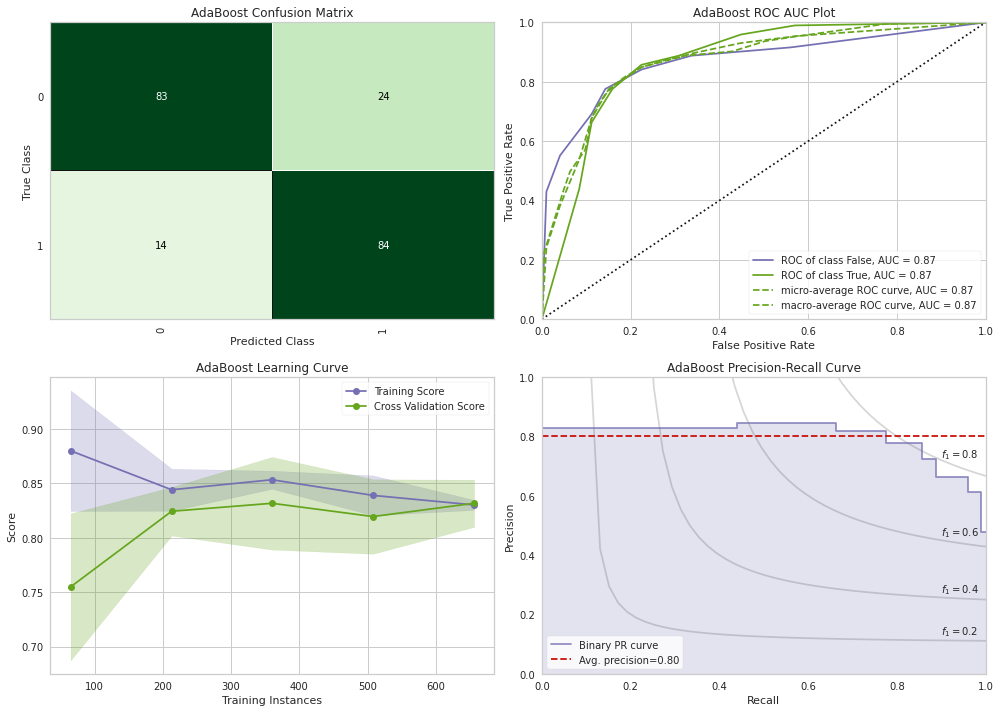

In [201]:
# --- AdaBoost Accuracy ---
ABAcc = accuracy_score(y_pred_AB, y_test)
print('.:. AdaBoost Accuracy:'+'\033[1m {:.2f}%'.format(ABAcc*100)+' .:.')

# --- AdaBoost Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_AB))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))
# --- AdaBoost Confusion Matrix ---
abcmatrix = ConfusionMatrix(ABclassifier, ax=ax1, cmap='Greens',
                            title='AdaBoost Confusion Matrix')
abcmatrix.fit(x_train, y_train)
abcmatrix.score(x_test, y_test)
abcmatrix.finalize()

# --- AdaBoost ROC AUC ---
abrocauc = ROCAUC(ABclassifier, classes=['False', 'True'], ax=ax2,
                  title='AdaBoost ROC AUC Plot')
abrocauc.fit(x_train, y_train)
abrocauc.score(x_test, y_test)
abrocauc.finalize()
# --- AdaBoost Learning Curve ---
ablc = LearningCurve(ABclassifier, ax=ax3, title='AdaBoost Learning Curve')
ablc.fit(x_train, y_train)
ablc.finalize()

# --- AdaBoost Precision Recall Curve ---
abpc = PrecisionRecallCurve(ABclassifier, ax=ax4, ap_score=True, iso_f1_curves=True, 
                            title='AdaBoost Precision-Recall Curve')
abpc.fit(x_train, y_train)
abpc.score(x_test, y_test)
abpc.finalize()

plt.tight_layout();


In [202]:
# --- Create Accuracy Comparison Table ---
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine', 
                                  'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest',  
                                  'AdaBoost'], 
                        'Accuracy': [LRAcc*100, KNNAcc*100, SVMAcc*100, GNBAcc*100, DTCAcc*100, RFAcc*100, 
                                     ABAcc*100]})

# --- Create Accuracy Comparison Table ---
compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='Greens').hide_index().set_properties(**{'font-family': 'Segoe UI'})


Model,Accuracy
K-Nearest Neighbour,95.121951
Random Forest,88.292683
Support Vector Machine,82.439024
Logistic Regression,81.463415
AdaBoost,81.463415
Decision Tree,79.024390
Gaussian Naive Bayes,76.097561
